# This notebook is a playground to learn data analysis. We will use cricket data that we scraped using the PyCricket.py code from espn cricinfo.

## Let's read the Test players data from a csv that we already downloaded. To read from the csv file we will use the read_csv module from the pandas library. Pandas is an open source library written in python for easier maniupulation of data. 

In [1]:
import pandas as pd

### One of the key features of pandas is that it provides DataFrame object.  DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In [2]:
# The data set contains top 100 run total run scorers among the test batsman
df = pd.read_csv("Data\TestCricket_PlayerStats.csv")
df.head()

,Player,Country,StartYear,EndYear,Matches,Innings,NO,Runs,Highest,Average,100s,50s,0s
0,SR Tendulkar,INDIA,1989,2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting,AUS,1995,2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis,SA,1995,2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid,INDIA,1996,2012,164,286,32,13288,270,52.31,36,63,8
4,KC Sangakkara,SL,2000,2015,134,233,17,12400,319,57.40,38,52,11


In [3]:
# Learn the auto data types assigned for each column of the data frame
df.dtypes

Player        object
Country       object
StartYear      int64
EndYear        int64
Matches        int64
Innings        int64
NO             int64
Runs           int64
Highest       object
Average      float64
100s           int64
50s            int64
0s             int64
dtype: object

In [4]:
# Learn how many rows and columns does the data has (df has 100 rows and 13 columns)
df.shape

(100, 13)

In [5]:
# Accessing a column values (df.Country also works)
df['Country'].head() 

0    INDIA
1      AUS
2       SA
3    INDIA
4       SL
Name: Country, dtype: object

In [6]:
# Accessing a row by row id 
# Note: Python doesn't slice by including the end index
df[2:3]

,Player,Country,StartYear,EndYear,Matches,Innings,NO,Runs,Highest,Average,100s,50s,0s
2,JH Kallis,SA,1995,2013,166,280,40,13289,224,55.37,45,58,16


In [7]:
# All rows upto the end index
df[:3]

,Player,Country,StartYear,EndYear,Matches,Innings,NO,Runs,Highest,Average,100s,50s,0s
0,SR Tendulkar,INDIA,1989,2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting,AUS,1995,2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis,SA,1995,2013,166,280,40,13289,224,55.37,45,58,16


In [8]:
# Reading row by a specific value of a column
df[df["Player"] == "JH Kallis"]

,Player,Country,StartYear,EndYear,Matches,Innings,NO,Runs,Highest,Average,100s,50s,0s
2,JH Kallis,SA,1995,2013,166,280,40,13289,224,55.37,45,58,16


In [9]:
# Basic statistical computation
df.describe()

,StartYear,EndYear,Matches,Innings,NO,Runs,Average,100s,50s,0s
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1984.320000,1998.390000,101.210000,171.970000,15.68000,7246.410000,46.613500,19.500000,34.160000,10.97000
std,20.443507,18.195845,28.883358,47.444695,8.62915,2313.981911,8.141652,8.410551,11.620011,4.16201
min,1908.000000,1930.000000,52.000000,80.000000,4.00000,4594.000000,30.300000,4.000000,13.000000,3.00000
25%,1974.750000,1991.750000,79.000000,137.000000,10.00000,5457.500000,42.177500,14.000000,27.000000,8.00000
50%,1990.000000,2004.000000,100.500000,171.000000,14.00000,6919.500000,45.905000,18.000000,31.500000,11.00000
75%,1999.250000,2013.000000,116.000000,194.250000,19.00000,8130.750000,50.602500,23.000000,39.000000,14.00000
max,2012.000000,2017.000000,200.000000,329.000000,49.00000,15921.000000,99.940000,51.000000,68.000000,22.00000


#### We can see above that on average the top 100 run scores of test match batsman played 172 innings with 46.6 average score

In [10]:
# How many players from each country do top 100 players represent?
top100_group = df.groupby('Country')
top100_group.size()

Country
AUS      22
ENG      24
INDIA    11
NZ        7
PAK       8
SA        7
SL        8
WI       12
ZIM       1
dtype: int64

In [11]:
top100_sum = top100_group[['Matches', 'Innings', 'NO', 'Runs', '100s', '50s', '0s']].sum().sort_values(by='Runs', ascending=False)
top100_sum

,Matches,Innings,NO,Runs,100s,50s,0s
Country,,,,,,,
ENG,2296,3994,323,163827,426,795,235
AUS,2079,3560,370,156616,461,711,233
WI,1300,2208,195,93946,244,451,134
INDIA,1367,2237,210,93197,244,450,133
SL,837,1420,115,59109,156,263,107
SA,828,1368,128,57423,159,261,85
PAK,759,1264,133,55657,155,264,90
NZ,592,1034,75,40072,93,194,75
ZIM,63,112,19,4794,12,27,5


#### Now we will plot the data to get simple visuals

In [13]:
# First import the matplotlib library
import matplotlib.pyplot as plt

# Allow python to display charts
%matplotlib inline

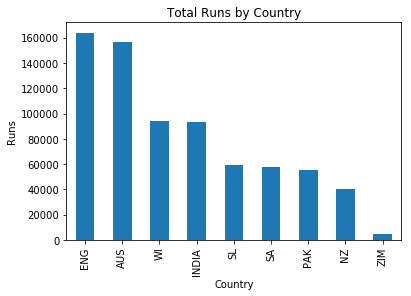

In [14]:
# Plot the total runs by country among the top 100 batsman
my_plot = top100_sum['Runs'].plot(kind='bar',legend=None,title="Total Runs by Country")
my_plot.set_xlabel("Country")
my_plot.set_ylabel("Runs")

### Exercise: Plot a bar chart showing number of players per country in decreasing order

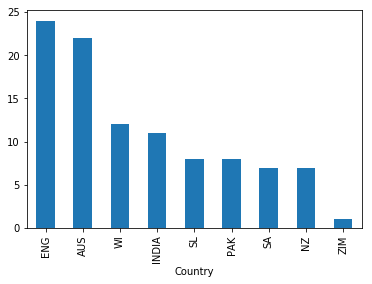

In [17]:
top100_group.size().sort_values(ascending=False).plot(kind='bar')

In [18]:
import seaborn as sb

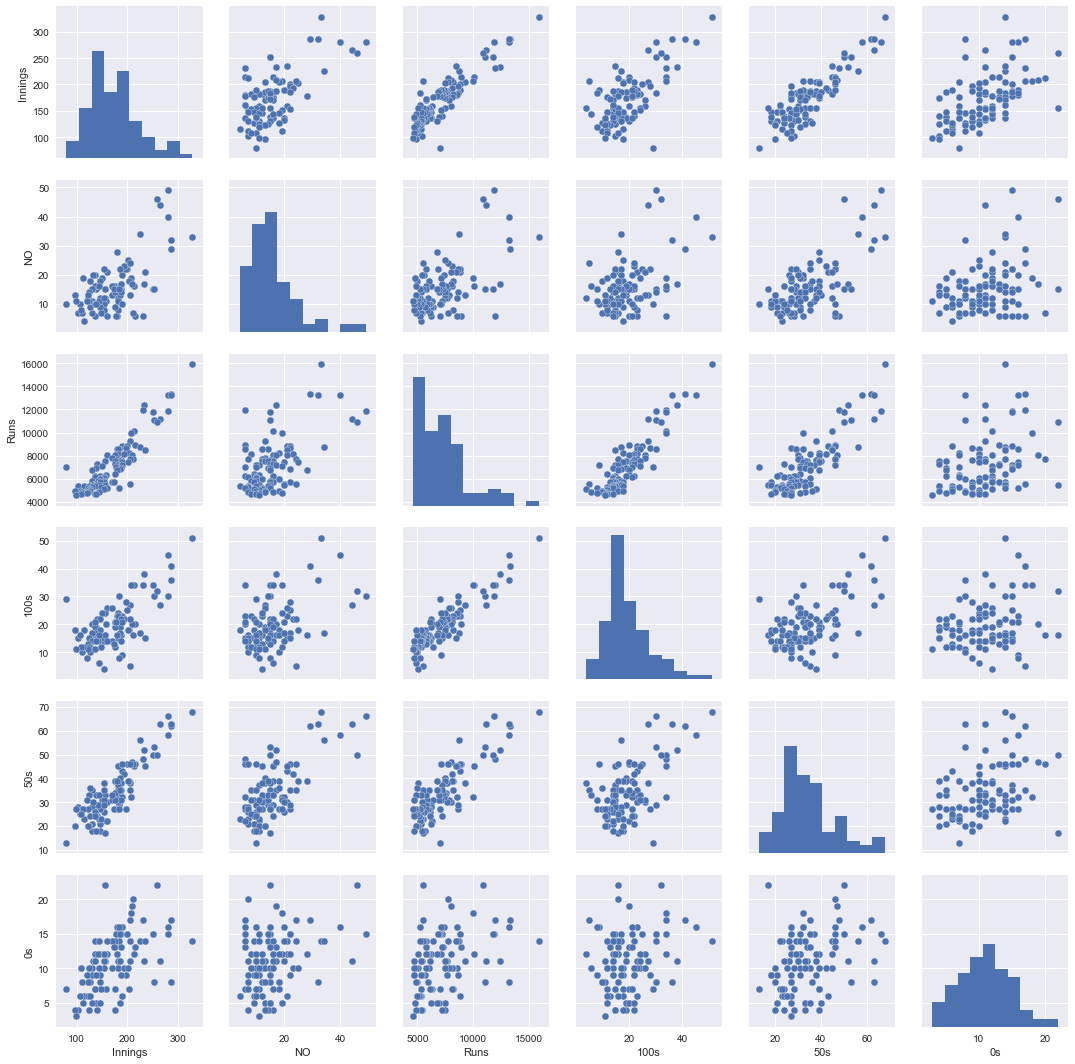

In [19]:
df_selected = df[['Player','Country','Innings','NO','Runs','Highest', '100s','50s','0s']]
sb.pairplot(df_selected)